# Partial Differential Equations

For our study of partial differential equations, we will explore how to implement a basic routine "by hand". Methods for solving systems of partial differential equations are commonly tailored to specific systems, so while a number of specialized python packages exist for solving PDEs, there is no single standard or common package. Here, we will implement routines by using numpy functionality we have already become familiar with.

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## The advection equation

Recall we can solve initial value problems using any desired time integration scheme we saw in our study of ODEs, and a variety of different methods for computing derivatives in other dimensions. Below is a function that returns $f(x, t+\Delta t)$ given $f(x, t)$ for the 1-dimensional advection equation,

$$
\partial_t f(x, t) - c \partial_x f(x, t) = 0
$$

The timestep is taken using Euler's method, and "right-handed" finite differencing method is used to compute the x-derivative from $f(x, t)$ and $f(x+\Delta x, t)$.
This scheme is depicted schematically below.

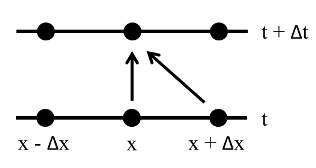

Written out explicitly, we are computing

$$
f(x, t+\Delta t) = f(x, t) + c \Delta t \, \frac{f(x+\Delta x, t) - f(x,t)}{\Delta x}\,.
$$

We can improve this method using higher-order finite difference schemes, e.g. using "stencils" found on the
[wikipedia finite difference coefficient](https://en.wikipedia.org/wiki/Finite_difference_coefficient) page.

In [4]:
def advect_step(f, c, dx, dt) :
    """
    Function to compute the solution to the advection
    equation at the next timestep using Euler's method
    and a right-handed finite differencing scheme with
    Dirichlet boundary conditions.
    
    Accepts parameters:
    f: 1-d array containing function values
    c: wave speed
    dx: spacing between points of f
    dt: size of timestep
    """
    f_new = np.zeros_like(f)
    
    # Right-handed difference for derivative of f
    f_deriv = (f[2:] - f[1:-1]) / dx
    
    # Forward-Euler time step for all points except the boundaries
    f_new[1:-1] = f[1:-1] + dt*c*f_deriv
    
    # Apply boundary conditions
    f_new[0] = 0.0
    f_new[-1] = 0.0
    
    return f_new

Having written this, we then initialize a Gaussian function on a grid

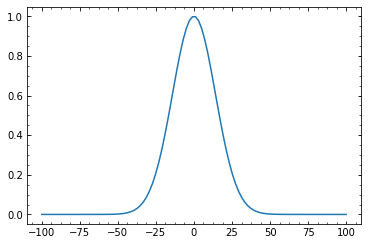

In [5]:
xs = np.linspace(-100, 100, 100)
dx = xs[1] - xs[0]
dt = dx/10. # Set dt in terms of dx
c = 1 # unit wave speed

# We will initialize with an un-normalized Gaussian function.
f_ini = np.exp(-xs**2/20**2)

plt.plot(xs, f_ini)

We can take a single timestep. Because the timestep should be fairly small, the new function should not look very different than the original.

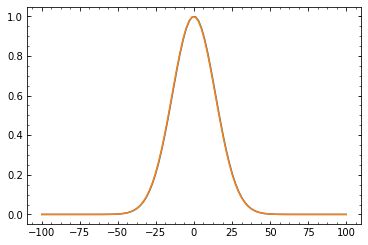

In [6]:
# Here we take one timestep.
f = advect_step(f_ini, c, dx, dt)
plt.plot(xs, f_ini)
plt.plot(xs, f)

We can also take many timesteps. The above initialization has also been added below so we can conveniently change parameters related to resolution and re-run.

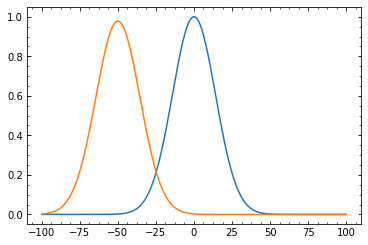

In [7]:
# We can also take a larger number of timesteps.
# We do not bother to store intermediate steps.

xs = np.linspace(-100, 100, 1000)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 50 # specify a final time.
n_steps = int(t_final / dt)
c = 1

f_ini = np.exp(-xs**2/20**2)
f = f_ini
for n in range(n_steps) :
    f = advect_step(f, c, dx, dt)
    
plt.plot(xs, f_ini)
plt.plot(xs, f)

## The wave equation in 2+1 dimensions

Below is an implementation of the wave equation in two spatial dimensions, with Dirichilet boundary conditions. This implementation uses a centered second derivative and Euler's method for timestepping, a method which is not absolutely stable.

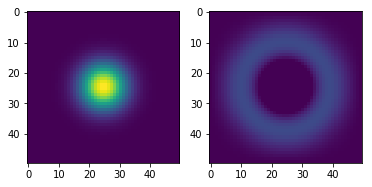

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def wave_step(f, g, dx, dt) :
    """
    Function to compute the solution to the 2-d wave
    equation at the next timestep using Euler's method,
    centered finite differencing, and Dirichlet
    boundary conditions.
    
    Accepts parameters:
    f: 2-d array containing function values
    g: 2-d array containing function values, time-derivative of f
    dx: spacing between points of f, assuming dx = dy
    dt: size of timestep
    """
    f_new = np.zeros_like(f)
    g_new = np.zeros_like(g)
    
    # 2-D Laplacian of f using array slicing, excluding boundaries
    # For an N x N array f, f_lap is the N-1 x N-1 array in the "middle"
    f_lap = (f[2:,1:-1] - 2*f[1:-1,1:-1] + f[:-2,1:-1]) / dx**2\
            + (f[1:-1,2:] - 2*f[1:-1,1:-1] + f[1:-1,:-2]) / dx**2
    
    # Alternative 2-D Laplacian of f, using a convolution operator.
    # ker = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / dx**2
    # f_lap = sig.convolve(f, ker, mode='valid')
    
    # Forward-Euler time step for all points except the boundaries
    g_new[1:-1,1:-1] = g[1:-1,1:-1] + dt*f_lap
    f_new = f + dt*g

    # Apply boundary conditions
    f_new[:,0] = 0
    f_new[:,-1] = 0
    f_new[0,:] = 0
    f_new[-1,:] = 0
    g_new[:,0] = 0
    g_new[:,-1] = 0
    g_new[0,:] = 0
    g_new[-1,:] = 0

    return f_new, g_new

xs = np.linspace(-100, 100, 50)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 50
n_steps = int(t_final/dt)

f_ini = np.exp(-(xs[np.newaxis,:]**2 + xs[:,np.newaxis]**2)/30**2)
f = f_ini
g = np.zeros_like(f)
for n in range(n_steps) :
    f, g = wave_step(f, g, dx, dt)

plt.subplot(1, 2, 1)
plt.imshow(f_ini, vmin=np.min(f_ini), vmax=np.max(f_ini))
plt.subplot(1, 2, 2)
plt.imshow(f, vmin=np.min(f_ini), vmax=np.max(f_ini))